In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.colors import LogNorm

#### Optimization
(Taken From P188/288 @ UC Berkeley)

Consider the surface $z = ax^2 + by^2 - 1$. Let $a = 1$ and $b = 1$ and make the contour plot. The global minimum of this surface is at $(x,y) = (0,0)$ (marked by a star).

In [ ]:
def minima_surface(x,y,a,b):
    return a*x**2+b*y**2-1

/tmp/ipython-input-444286502.py:4: UserWarning: Log scale: values of z <= 0 have been masked
  ax.contour(x, y, z, levels=np.logspace(0, 5, 35), norm=LogNorm(), cmap="RdYlBu_r")


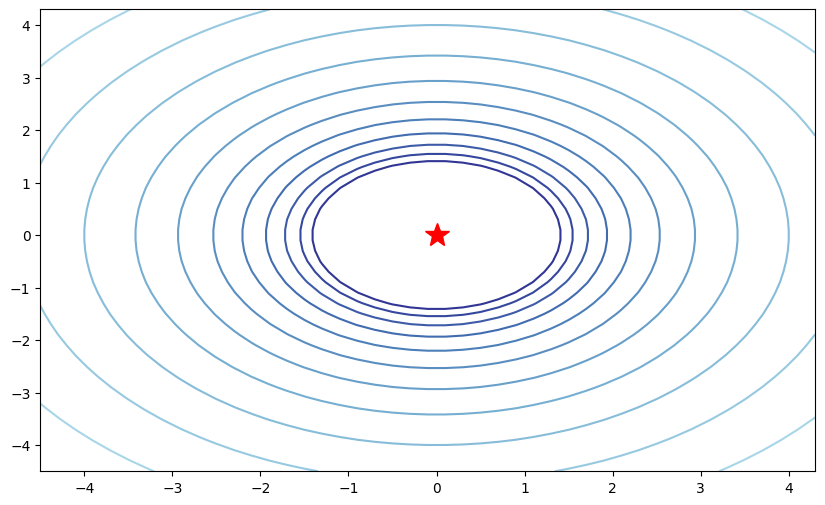

In [ ]:
x, y = np.meshgrid(np.arange(-4.5, 4.5, 0.2), np.arange(-4.5, 4.5, 0.2))
fig, ax = plt.subplots(figsize=(10, 6))
z=minima_surface(x,y,1,1)
ax.contour(x, y, z, levels=np.logspace(0, 5, 35), norm=LogNorm(), cmap="RdYlBu_r")
ax.plot(0,0, 'r*', markersize=18)

Now, let us visualize what different gradient descent methods do. We will be especially interested in trying to understand how various hyperparameters. especially the learning rate $\eta$, affect our performance.

We denote the parameters by $\theta$ and the energy function we are trying to minimize by $E(\theta)$.

First, consider a $\textbf{simple gradient descent method}$. In this method, we will take steps in the direction of the local gradient. Given some parameters $\theta$, we adjust the parameters at each iteration so that

$$ \theta_{t+1} = \theta_t - \eta_t \nabla_{\theta} E(\theta_t) $$

where we have introduced the learning rate $\eta_t$ that controls how large a step we take. In general, the algorithm is extremely sensitive to the choice of $\eta_t$. If $\eta_t$ is too large, then one can wildly oscillate around minima and miss important structure at small scales. If $\eta_t$ is too small, then the learning/minimization procedure becomes extremely slow. This raises the natural question: What sets the natural scale for the learning rate and how can we adaptively choose it?

<span style="color:blue"> <i> 1. We run gradient descent on the surface $z = x^2 + y^2 - 1$. Start from an inital point $(-2,4)$ and plot trajectories for $\eta = 0.1, 0.5, 1$. Take 100 steps. Do you see different behaviors that arise as $\eta$ increases? (The trajectory converges to the global minima in multiple steps for small learning rates ($\eta$ = 0.1). Increasing the learning rate to 1 causes the trajectory to oscillate around the global minima before converging.)</i></span>

Hint:

In this problem, $\theta = (x,y)$, and $E(\theta) = x^2 + y^2 - 1$, i.e. find $(x,y)$ which minimizes $x^2 + y^2 - 1$. Hence, $\nabla_{\theta} E(\theta) = (2x, 2y)$.
$$ (x,y)_{t+1} = (x,y)_t - \eta_t \cdot (2x, 2y)_t $$
It is given that $(x,y)_{t=0} = (-2,4)$.

Suppose that you take 3 steps and obtain $(x,y)_{t=1} = (-1.6, 3.2), (x,y)_{t=2} = (-1.3, 2.6), (x,y)_{t=3} = (-1.0, 2.0)$. Then, you can plot this trajectory in the following way:

/tmp/ipython-input-725891555.py:4: UserWarning: Log scale: values of z <= 0 have been masked
  ax.contour(x, y, z, levels=np.logspace(0, 5, 35), norm=LogNorm(), cmap="RdYlBu_r")


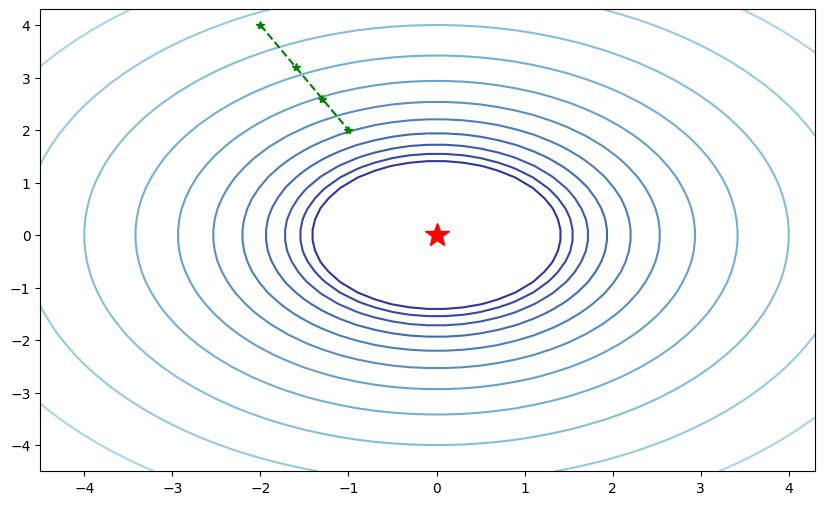

In [ ]:
x, y = np.meshgrid(np.arange(-4.5, 4.5, 0.2), np.arange(-4.5, 4.5, 0.2))
fig, ax = plt.subplots(figsize=(10, 6))
z=minima_surface(x,y,1,1)
ax.contour(x, y, z, levels=np.logspace(0, 5, 35), norm=LogNorm(), cmap="RdYlBu_r")
ax.plot(0,0, 'r*', markersize=18)

Nsteps = 3
trajectory = np.zeros([Nsteps+1,2])
trajectory[0,:] = [-2,4]; trajectory[1,:] = [-1.6,3.2]; trajectory[2,:] = [-1.3,2.6]; trajectory[3,:] = [-1,2];

xs=trajectory[:,0]
ys=trajectory[:,1]
ax.plot(xs,ys, 'g--*')

plt.show()

In [ ]:
def grad_minima_surface(params,a=1,b=1):
    x=params[0]
    y=params[1]
    grad_x= 2*a*x
    grad_y= 2*b*y
    return [grad_x,grad_y]


In [ ]:
def gd(grad, init, n_epochs, eta):
    params=np.array(init)
    param_traj=np.zeros([n_epochs+1,2])
    param_traj[0,]=init
    v=0;
    for j in range(n_epochs):
        v=eta*(np.array(grad(params)))
        params=params-v
        param_traj[j+1,]=params
    return param_traj


In [ ]:
def overlay_trajectory_contour(ax,trajectory, label,color='k',lw=2):
    xs=trajectory[:,0]
    ys=trajectory[:,1]
    ax.plot(xs,ys, color, label=label,lw=lw)
    return ax;

/tmp/ipython-input-3257524418.py:10: UserWarning: Log scale: values of z <= 0 have been masked
  ax.contour(x, y, z, levels=np.logspace(0, 5, 35), norm=LogNorm(), cmap="RdYlBu_r")


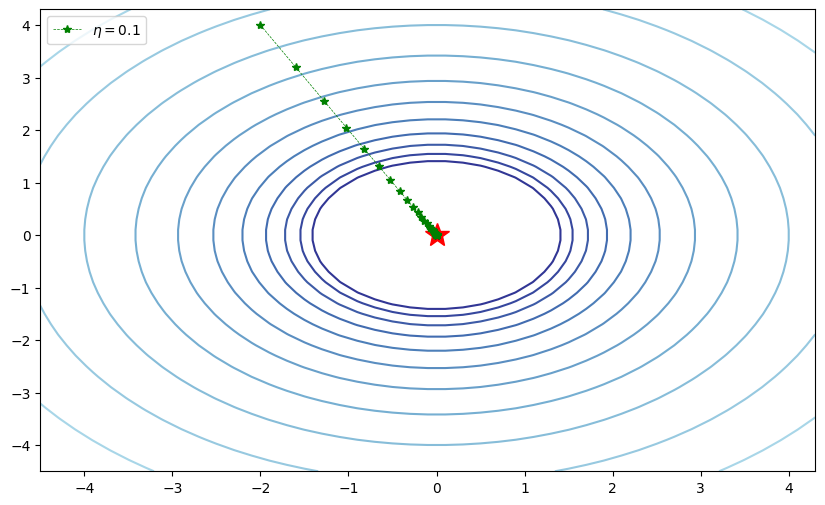

/tmp/ipython-input-3257524418.py:24: UserWarning: Log scale: values of z <= 0 have been masked
  ax.contour(x, y, z, levels=np.logspace(0, 5, 35), norm=LogNorm(), cmap="RdYlBu_r")


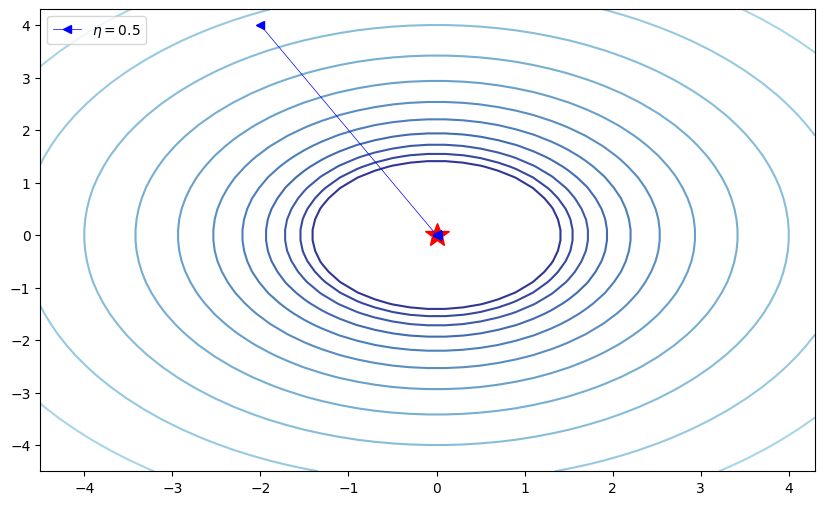

/tmp/ipython-input-3257524418.py:37: UserWarning: Log scale: values of z <= 0 have been masked
  ax.contour(x, y, z, levels=np.logspace(0, 5, 35), norm=LogNorm(), cmap="RdYlBu_r")


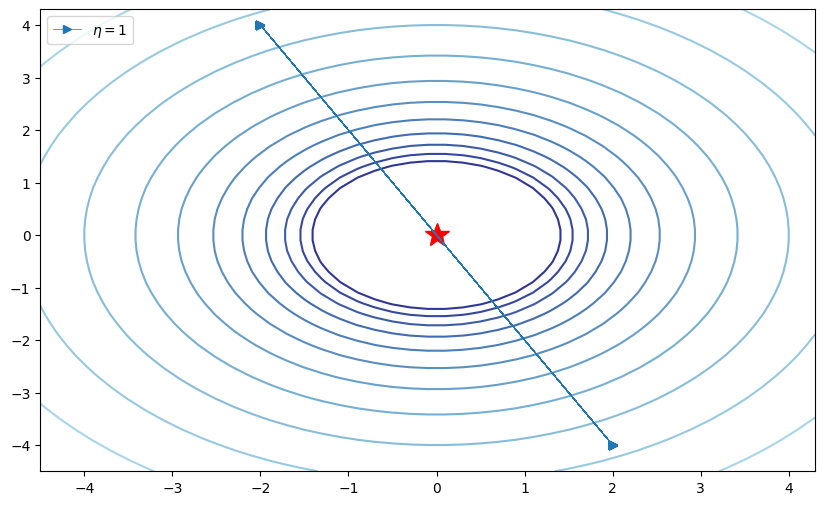

In [ ]:
init=[-2,4]

eta1=0.1
eta2=0.5
eta3=1

x, y = np.meshgrid(np.arange(-4.5, 4.5, 0.2), np.arange(-4.5, 4.5, 0.2))
fig, ax = plt.subplots(figsize=(10, 6))
z=minima_surface(x,y,1,1)
ax.contour(x, y, z, levels=np.logspace(0, 5, 35), norm=LogNorm(), cmap="RdYlBu_r")
ax.plot(0,0, 'r*', markersize=18)

gd_1=gd(grad_minima_surface,init, n_epochs=100, eta=eta1)

overlay_trajectory_contour(ax,gd_1,'$\eta=$%s'% eta1,'g--*', lw=0.5)

plt.legend(loc=2)
plt.show()


x, y = np.meshgrid(np.arange(-4.5, 4.5, 0.2), np.arange(-4.5, 4.5, 0.2))
fig, ax = plt.subplots(figsize=(10, 6))
z=minima_surface(x,y,1,1)
ax.contour(x, y, z, levels=np.logspace(0, 5, 35), norm=LogNorm(), cmap="RdYlBu_r")
ax.plot(0,0, 'r*', markersize=18)

gd_2=gd(grad_minima_surface,init, n_epochs=100, eta=eta2)

overlay_trajectory_contour(ax,gd_2,'$\eta=$%s'% eta2,'b-<', lw=0.5)

plt.legend(loc=2)
plt.show()

x, y = np.meshgrid(np.arange(-4.5, 4.5, 0.2), np.arange(-4.5, 4.5, 0.2))
fig, ax = plt.subplots(figsize=(10, 6))
z=minima_surface(x,y,1,1)
ax.contour(x, y, z, levels=np.logspace(0, 5, 35), norm=LogNorm(), cmap="RdYlBu_r")
ax.plot(0,0, 'r*', markersize=18)

gd_3=gd(grad_minima_surface,init, n_epochs=100, eta=eta3)

overlay_trajectory_contour(ax,gd_3,'$\eta=$%s'% eta3,'->', lw=0.5)

plt.legend(loc=2)
plt.show()



Next, take Beale's Function, a convex function often used to test optimization problems of the form:

$$z=(1.5−x+xy)^2+(2.25−x+xy^2)^2+(2.6250−x+xy)^3$$

The global minimum of this function is at $(3,0.5)$ (marked by a star).

In [ ]:
def beales_function(x,y):
    f=np.square(1.5-x+x*y)+np.square(2.25-x+x*y*y)+np.square(2.625-x+x*y**3)
    return f

def contour_beales_function():
    #plot beales function
    x, y = np.meshgrid(np.arange(-4.5, 4.5, 0.2), np.arange(-4.5, 4.5, 0.2))
    fig, ax = plt.subplots(figsize=(10, 6))
    z=beales_function(x,y)
    ax.contour(x, y, z, levels=np.logspace(0, 5, 35), norm=LogNorm(), cmap="RdYlBu_r")
    ax.plot(3,0.5, 'r*', markersize=18)

    ax.set_xlabel('$x$')
    ax.set_ylabel('$y$')

    ax.set_xlim((-4.5, 4.5))
    ax.set_ylim((-4.5, 4.5))

    return fig,ax

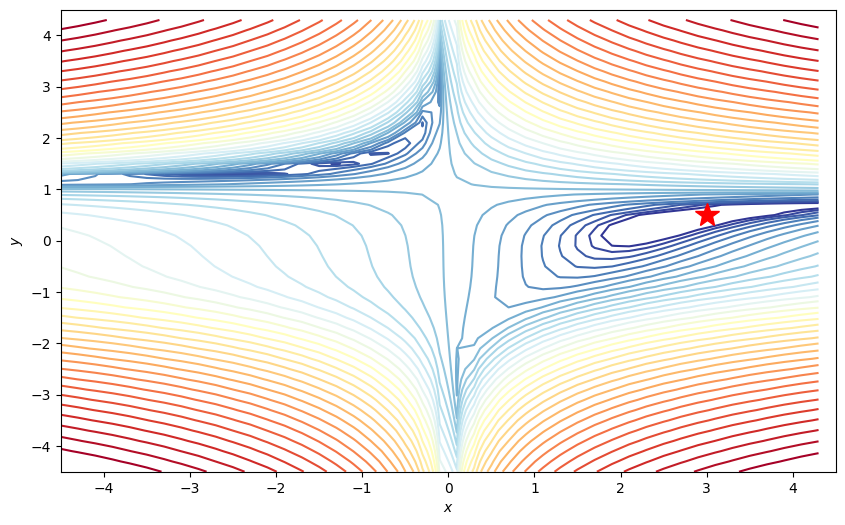

In [ ]:
fig,ax =contour_beales_function()
plt.show()

One problem with gradient descent is that it has no memory of where it comes from. This can be an issue when there are many shallow minima in our landscape. If we make an analogy with a ball rolling down a hill, the lack of memory is equivalent to having has no inertia or momentum (i.e. completely overdamped dynamics). Without momentum, the ball has no kinetic energy and cannot climb out of shallow minima. Then, we can add a memory or momentum term to the stochastic gradient descent term above:

$$ v_t = \gamma v_{t-1} + \eta_t \nabla_{\theta} E(\theta_t) $$
$$ \theta_{t+1} = \theta_t - v_t $$

with $0 \leq \gamma < 1$ called the momentum parameter. When $\gamma = 0$, this reduces to ordinary gradient descent, and increasing $\gamma$ increases the inertial contribution to the gradient. From the equations above, we can see that typical memory lifetimes of the gradient is given by $(1-\gamma)^{-1}$. For $\gamma = 0$ as in gradient descent, the lifetime is just one step. For $\gamma = 0.9$, we typically remember a gradient for ten steps. We call this method $\textbf{gradient descent with momentum}$.

In stochastic gradient descent, with and without momentum, we still have to specify a schedule for tuning the learning rates $\eta_t$ as a function of time. In the context of Newton's method, this presents a number of dilemmas. The learning rate is limited by the steepest direction which can change depending on where in the landscape we are. To circumvent this problem, ideally our algorithm would take large steps in shallow, flat directions and small steps in steep, narrow directions. Second-order methods accomplish this by calculating or approximating the Hessian and normalizing the learning rate by the curvature. However, this is very computationally expensive for extremely large models. Ideally, we would like to be able to adaptively change our step size to match the landscape without paying the steep computational price of calculating or approximating Hessians.

Recently, a number of methods have been introduced that accomplish this by tracking not only the gradient but also the second moment of the gradient. These methods include AdaGrad, AdaDelta, RMS-Prop, and ADAM.

In $\textbf{ADAM}$, we keep a running average of both the first and second moment of the gradient and use this information to adaptively change the learning rate for different parameters. In addition to keeping a running average of the first and second moments of the gradient, ADAM performs an additional a bias correction to account for the fact that we are estimating the first two moments of the gradient using a running average (denoted by the hats in the update rule below). The update rule for ADAM is given by (where multiplication and division are understood to be element wise operations below)

![alt text](eq_adam3.png "Title")

where $\beta_1$ and $\beta_2$ set the memory lifetime of the first and second moment and are typically take to be $0.9$ and $0.99$ respectively, and $\eta_t$ is a learning rate typically chosen to be $10^{−3}$, and $\epsilon \sim 10^{−8}$ is a small regularization constant to prevent divergences.

<span style="color:blue"> <i> 1. Take Beale's Function. We will use 3 different methods, gradient descent with and without momentum and ADAM, to find the minimum starting at different initial points: $(x,y) = (4,3), (-2,-4), (-1,4)$. Take $10^4$ steps. Set the learning rate for gradient descent (both with and without momentum) and ADAM to $10^{-6}$ and $10^{-3}$, respectively. Plot trajectories. Make sure to lable each plot. </i></span>

Hint:

Here, $\theta$ = (x,y), and $E(\theta) = E(x,y) = (1.5−x+xy)^2+(2.25−x+xy^2)^2+(2.6250−x+xy)^3$. Hence, $\nabla_{\theta}E(\theta) = (\nabla_x E(x,y), \nabla_y E(x,y))$.

Suppose that you take 3 steps and obtain $(x,y)_{t=1} = (-1.6, 3.2), (x,y)_{t=2} = (-1.3, 2.6), (x,y)_{t=3} = (-1.0, 2.0)$. Then, you can plot this trajectory in the following way:

***

In [ ]:
fig, ax=contour_beales_function()

Nsteps = 3
trajectory = np.zeros([Nsteps+1,2])
trajectory[0,:] = [-2,4]; trajectory[1,:] = [-1.6,3.2]; trajectory[2,:] = [-1.3,2.6]; trajectory[3,:] = [-1,2];

xs=trajectory[:,0]
ys=trajectory[:,1]
ax.plot(xs,ys, 'g--*')

plt.show()

In [ ]:
# Useful funcs

def grad_beales_function(params):
    x=params[0]
    y=params[1]
    grad_x=2*(1.5-x+x*y)*(-1+y)+2*(2.25-x+x*y**2)*(-1+y**2)+2*(2.625-x+x*y**3)*(-1+y**3)
    grad_y=2*(1.5-x+x*y)*x+4*(2.25-x+x*y**2)*x*y+6*(2.625-x+x*y**3)*x*y**2
    return [grad_x,grad_y]

def overlay_trajectory_contour_M(ax,trajectory, label,color='k',lw=2):
    xs=trajectory[:,0]
    ys=trajectory[:,1]
    ax.plot(xs,ys, color, label=label,lw=lw)
    ax.plot(xs[-1],ys[-1],color+'>', markersize=14)
    return ax;